### VGG16 with Keras

VGG is a Convolutional Neural Network architcture, 


It was proposed by Karen Simonyan and Andrew Zisserman of Oxford Robotics Institute in the the year 2014.


It was submitted to Large Scale Visual Recognition Challenge 2014 (ILSVRC2014) and The model achieves 92.7% top-5 test accuracy in ImageNet. 


ImageNet is one the on the largest data-set available. It has 14 million hand-annotated images.
http://www.image-net.org/challenges/LSVRC/2014/

Researchers from the Oxford Visual Geometry Group, or VGG for short, participate in the ILSVRC challenge.
In 2014, convolutional neural network models (CNN) developed by the VGG won the image classification tasks.


VGG released two different CNN models, specifically a 16-layer model and a 19-layer model.

<img src='vgg.png' width='80%' height='80%'/>

source:https://medium.com/datadriveninvestor/try-already-existing-cnn-model-lets-building-vgg16-with-keras-8b1ce6839b5e

### Load the VGG Model in Keras

#### Keras provides both the 16-layer and 19-layer version via the VGG16 and VGG19 classes

In [1]:

from keras.applications.vgg16 import VGG16
model = VGG16()

Using TensorFlow backend.


The first time we run this example, Keras will download the weight files from the Internet and store them in the ~/.keras/models directory.

Note: that the weights are about 528 megabytes, so the download may take a few minutes depending on the speed of your Internet connection.

In [2]:
model.summary()
# kernal(3,3) x in(3) x out(64) + out(64)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [3]:
model.save("mymodel.h5")

### Load and Prepare Image

In [3]:
from keras.preprocessing.image import load_img,img_to_array
img = load_img('cat.jpg',target_size=(224,224))


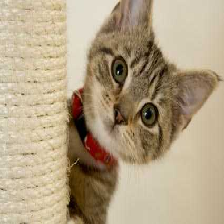

In [4]:
img

In [5]:
img1 = img_to_array(img)

In [7]:
# img1[:2]

In [8]:
img1.shape

(224, 224, 3)

In [9]:
### Reshape data
image = img1.reshape((1,224,224,3))

In [10]:
image.shape

(1, 224, 224, 3)

### Next, the image pixels need to be prepared in the same way as the ImageNet training data was prepared.

In [11]:
from keras.applications.vgg16 import preprocess_input

In [12]:
image=preprocess_input(image)

### — Very Deep Convolutional Networks for Large-Scale Image Recognition, 2014.

We can call the predict() function on the model in order to get a prediction of the probability of the image belonging to each of the 1000 known object types.

In [13]:
### make prediction
y = model.predict(image)

In [15]:
# y

### Keras provides a function to interpret the probabilities called decode_predictions().

In [16]:
from keras.applications.vgg16 import decode_predictions

In [17]:
# !pip install wikipedia
pred = decode_predictions(y,top=1000)
p=pred[0][0][1].replace("_"," ")
print(p)
import wikipedia

# print(wikipedia.summary("America"))
print(wikipedia.summary(p))


Egyptian cat
Egyptian Maus are a small to medium-sized short-haired cat breed. They are one of the few naturally spotted breeds of domesticated cat. The spots of the Mau occur on only the tips of the hairs of its coat. It is considered a rare breed.




### Display target names

In [24]:
len(pred[0])

1000

In [25]:
for label in pred[0]:
    print(label[1],',',end=' ')


volleyball , rugby_ball , croquet_ball , soccer_ball , ping-pong_ball , tennis_ball , maraca , basketball , crash_helmet , balloon , bathing_cap , punching_bag , puck , baseball , golf_ball , football_helmet , bottlecap , airship , mouse , sunscreen , knee_pad , dumbbell , pencil_sharpener , barbell , racket , pick , pop_bottle , Band_Aid , oil_filter , digital_clock , rubber_eraser , face_powder , spotlight , water_bottle , rule , loupe , ocarina , piggy_bank , stopwatch , perfume , water_tower , sombrero , rock_beauty , lemon , ski_mask , whistle , buckle , orange , parachute , ballplayer , pill_bottle , mask , shield , drum , bobsled , wool , ski , web_site , drumstick , spaghetti_squash , Granny_Smith , carton , neck_brace , lotion , magnetic_compass , pool_table , plunger , running_shoe , nipple , hair_spray , pillow , maillot , soap_dispenser , Windsor_tie , matchstick , combination_lock , jigsaw_puzzle , hammer , paintbrush , book_jacket , space_heater , thimble , steel_drum , p

In [26]:
len(pred[0])

1000